<a href="https://colab.research.google.com/github/juancamcol1/proyectosMLE/blob/main/Tarea_regresi%C3%B3n_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Instalo scikilearn versión 1.1
!pip install scikit-learn==1.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 29.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.0.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.1.0 which is incompatible.


In [12]:
#Se importan librerias
import numpy as np
import pandas as pd

#Visualization Libraries
import seaborn as sn
import matplotlib.pyplot as plt

#To plot the graph embedded in the notebook
%matplotlib inline

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, accuracy_score

In [6]:
# Asigno a la variable publicidad el documento "publicidadejercicio.cvs"
url ="https://raw.githubusercontent.com/juancamcol1/proyectosMLE/main/publicidadejercicio.csv"
publicidad=pd.read_csv(url)
print(publicidad)

     Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]


In [7]:
public_array=np.array(publicidad)


In [9]:
#Se asigna el DF de publicidad
public=pd.DataFrame(publicidad)
public

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


<Figure size 400x800 with 0 Axes>

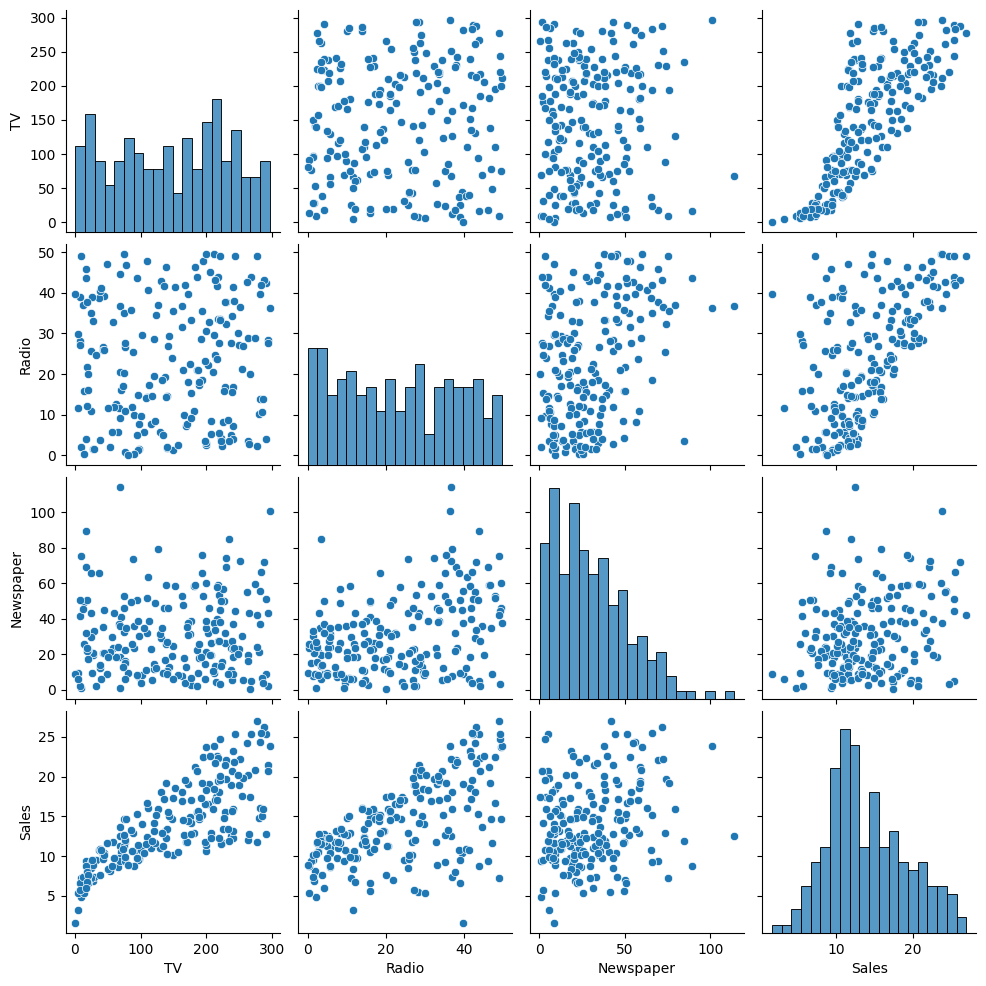

In [14]:
plt.figure(figsize=(4,8))
sn.pairplot(public[['TV','Radio','Newspaper','Sales']], diag_kws={'bins':20})

In [16]:

x_multiple=public_array[:,1:3]      # Asigno las columas de la regresion a la variable x_multiple
y_target=public_array[:,4]          # Asigno la variable de salida de la regresion
y_target = np.array(y_target).reshape(-1,1)   # Se modifica el shape de la salida

In [17]:
print(x_multiple.shape)

(200, 2)


In [19]:
print(x_multiple.shape)
print(y_target.shape)

(200, 2)
(200, 1)


In [20]:
# Se hace la division entre el set de entrenamiento y de prueba

x_train, x_test, y_train, y_test = train_test_split(x_multiple,y_target, test_size = 0.2, random_state=2)  ## 80% entrenamiento y 20% para testo


print("Shape de predictor de Entrenamiento x : ", x_train.shape)
print("Shape de predictor de Entrenamiento y : ", y_train.shape)
print("Shape de predictor de testeo x : ", x_test.shape)
print("Shape de predictor de testeo y : ", y_test.shape)
#print("Shape de predictor de Entrenamiento x2 : ", x2_train.shape)
#print("Shape de predictor de Test : " , x_test_1.shape)
#print("Shape de Etiqueta Test :", y_test_1.shape)

Shape de predictor de Entrenamiento x :  (160, 2)
Shape de predictor de Entrenamiento y :  (160, 1)
Shape de predictor de testeo x :  (40, 2)
Shape de predictor de testeo y :  (40, 1)


In [21]:
from sklearn.metrics import r2_score

In [23]:
reg_1 = LinearRegression()
reg_1.fit(x_train, y_train) # Se entrena el modelo

print ('Coeficientes: ', reg_1.coef_) #obtenemos los coeficientes de las variables independientes
print ('Intercepción: ', reg_1.intercept_) #obtenemos la intercepción
print ('Coeficiente de determinación: ', round(reg_1.score(x_test, y_test),2))

print ('Coeficiente de determinación: ', round(r2_score(y_train, reg_1.predict(x_train)), 3))


Coeficientes:  [[0.0474347  0.17565547]]
Intercepción:  [3.12655381]
Coeficiente de determinación:  0.76
Coeficiente de determinación:  0.915


In [24]:
y_pred_test=reg_1.predict(x_test)
y_pred_test

array([[14.16592553],
       [ 9.28593138],
       [ 6.79362034],
       [15.64678568],
       [18.41619205],
       [15.52299925],
       [ 7.28078946],
       [20.64652804],
       [12.83684141],
       [17.63600976],
       [10.42100662],
       [19.33754704],
       [ 9.08641902],
       [10.32954212],
       [14.27326063],
       [12.0050166 ],
       [ 8.83151036],
       [17.56748225],
       [16.68737043],
       [18.58704178],
       [16.92447417],
       [16.2119317 ],
       [11.61554858],
       [11.65719538],
       [14.84722055],
       [12.36171182],
       [15.38461851],
       [ 8.03314424],
       [16.67907499],
       [14.17350069],
       [16.65574406],
       [16.86329748],
       [13.06071194],
       [12.95974548],
       [ 8.63479964],
       [10.8467575 ],
       [22.18353699],
       [20.21412943],
       [16.21563824],
       [19.90341334]])

In [25]:
# Se obtiene la prediccion del dato
dat_prueba=np.array([[244,18]])
prueba_pred=(reg_1.predict(dat_prueba))
print("El valor de las ventas es: ",round(prueba_pred[0,0],2))

El valor de las ventas es:  17.86


# **Validación cruzada**

In [26]:
from sklearn.model_selection import KFold

In [29]:
public.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [30]:
x_multiple=public_array[:,1:3]      # Asigno las columas de la regresion a la variable x_multiple
y_target=public_array[:,4]          # Asigno la variable de salida de la regresion
y_target = np.array(y_target).reshape(-1,1)   # Se modifica el shape de la salida

In [32]:
kf = KFold(n_splits=5)

In [44]:
# Inicializar una lista para almacenar los resultados de la validación cruzada
mse_scores = []
r2_scores=[]

# Iterar sobre los pliegues
for train_index, test_index in kf.split(x_multiple):
    # Dividir los datos en conjuntos de entrenamiento y prueba
    x_train2, x_test2 = x_multiple[train_index], x_multiple[test_index]
    y_train2, y_test2 = y_target[train_index], y_target[test_index]

    # Inicializar y entrenar el modelo de regresión lineal
    model = LinearRegression()
    model.fit(X_train2, y_train2)

    # Realizar predicciones en el conjunto de prueba
    y_pred2 = model.predict(X_test2)

    # Calcular el error cuadrático medio (MSE) en el conjunto de prueba
    mse = mean_squared_error(y_test2, y_pred2)
    r2= round(r2_score(y_train2, model.predict(x_train2)), 3)
    # Agregar el MSE a la lista de puntuaciones
    mse_scores.append(mse)
    r2_scores.append(r2)

# Calcular el MSE promedio de todos los pliegues
average_mse = np.mean(mse_scores)
average_r2 = np.mean(r2_scores)


In [45]:
print('Los errores son: ', mse_scores)
print("Error cuadrático medio promedio:", average_mse)


Los errores son:  [3.071643354973301, 45.64298835962739, 38.502534169877165, 31.96337006284807, 26.39980402131684]
Error cuadrático medio promedio: 29.116067993728553


In [46]:
print('Los errores son: ',r2_scores)
print("Error cuadrático medio promedio:", average_r2)

Los errores son:  [0.901, 0.801, 0.691, 0.458, 0.081]
Error cuadrático medio promedio: 0.5864
